In [6]:
# Análise Exploratória de Dados - Componentes de Computador

## Objetivo
## Realizar uma análise exploratória completa dos dados, incluindo:
## - Análise univariada (distribuições, frequências)
## - Análise bivariada (correlações, relações)
## - Estatísticas descritivas
## - Visualizações informativas
## - Identificação de padrões e insights

## Estrutura da Análise
## 1. **Análise Univariada**: Distribuição individual de cada variável
## 2. **Análise Bivariada**: Relações entre pares de variáveis
## 3. **Estatísticas Descritivas**: Medidas de posição e dispersão
## 4. **Visualizações**: Gráficos para interpretação dos dados
## 5. **Insights e Conclusões**: Principais descobertas


In [7]:
# Importação das bibliotecas necessárias
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuração para visualizações
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Configuração pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Bibliotecas importadas e configuradas com sucesso!")


Bibliotecas importadas e configuradas com sucesso!


In [8]:
# Carregamento dos dados
def carregar_dados(arquivo):
    """Carrega dados de um arquivo JSON"""
    with open(f'data/{arquivo}', 'r', encoding='utf-8') as f:
        dados = json.load(f)
    return pd.DataFrame(dados)

# Carregamento de todos os datasets
datasets = {
    'CPUs': carregar_dados('cpus_clean.json'),
    'GPUs': carregar_dados('gpus_clean.json'),
    'RAM': carregar_dados('ram_clean.json'),
    'Motherboards': carregar_dados('motherboard_clean.json'),
    'PSUs': carregar_dados('psus_clean.json'),
    'SSDs': carregar_dados('ssds_clean.json'),
    'HDDs': carregar_dados('hdds_clean.json')
}

print("=== DATASETS CARREGADOS ===")
for nome, df in datasets.items():
    print(f"{nome:15}: {len(df):,} registros, {len(df.columns)} colunas")

total_registros = sum(len(df) for df in datasets.values())
print(f"\nTotal geral: {total_registros:,} registros")


=== DATASETS CARREGADOS ===
CPUs           : 324 registros, 9 colunas
GPUs           : 1,325 registros, 5 colunas
RAM            : 1,648 registros, 5 colunas
Motherboards   : 1,545 registros, 25 colunas
PSUs           : 916 registros, 4 colunas
SSDs           : 456 registros, 4 colunas
HDDs           : 247 registros, 4 colunas

Total geral: 6,461 registros


In [9]:
## 1. Análise Univariada - Distribuições Individuais

### 1.1 Análise de CPUs


In [10]:
# Análise univariada de CPUs
def analisar_cpus():
    """
    Realiza análise univariada detalhada dos dados de CPUs
    """
    cpu_df = datasets['CPUs'].copy()
    
    print("=== ANÁLISE UNIVARIADA - CPUs ===")
    print(f"Total de CPUs: {len(cpu_df)}")
    print(f"Colunas: {list(cpu_df.columns)}")
    
    # Análise de fabricantes
    print("\n1. DISTRIBUIÇÃO POR FABRICANTE:")
    fabricantes = cpu_df['manufacturer'].value_counts()
    print(fabricantes)
    print(f"Percentuais: {(fabricantes/len(cpu_df)*100).round(2)}")
    
    # Análise de sockets
    print("\n2. DISTRIBUIÇÃO POR SOCKET:")
    sockets = cpu_df['socket'].value_counts()
    print(sockets.head(10))
    
    # Análise de núcleos
    print("\n3. DISTRIBUIÇÃO POR NÚMERO DE NÚCLEOS:")
    cores = cpu_df['n_cores'].value_counts().sort_index()
    print(cores)
    
    # Análise de overclock
    print("\n4. SUPORTE A OVERCLOCK:")
    overclock = cpu_df['overclock'].value_counts()
    print(overclock)
    print(f"Percentual com overclock: {(overclock[True]/len(cpu_df)*100):.1f}%")
    
    # Estatísticas descritivas para núcleos
    print("\n5. ESTATÍSTICAS DESCRITIVAS - NÚCLEOS:")
    print(cpu_df['n_cores'].describe())
    
    return cpu_df

# Executar análise
cpu_data = analisar_cpus()


=== ANÁLISE UNIVARIADA - CPUs ===
Total de CPUs: 324
Colunas: ['manufacturer', 'model', 'socket', 'n_cores', 'base_clock_spd', 'boost_clock_spd', 'consumption', 'integrated_gpu', 'overclock']

1. DISTRIBUIÇÃO POR FABRICANTE:
manufacturer
Intel    203
AMD      121
Name: count, dtype: int64
Percentuais: manufacturer
Intel   62.65
AMD     37.35
Name: count, dtype: float64

2. DISTRIBUIÇÃO POR SOCKET:
socket
1151       61
AM4        59
1200       34
1700       34
2011-V3    33
1150       24
FM2+       16
AM3+       14
2066       13
AM5         7
Name: count, dtype: int64

3. DISTRIBUIÇÃO POR NÚMERO DE NÚCLEOS:
n_cores
0      4
1      5
2     59
4     82
6     69
8     66
10     8
12     9
14     2
16     8
18     2
24     3
32     4
64     3
Name: count, dtype: int64

4. SUPORTE A OVERCLOCK:
overclock
True     172
False    152
Name: count, dtype: int64
Percentual com overclock: 53.1%

5. ESTATÍSTICAS DESCRITIVAS - NÚCLEOS:
count   324.00
mean      6.68
std       7.27
min       0.00
25%    

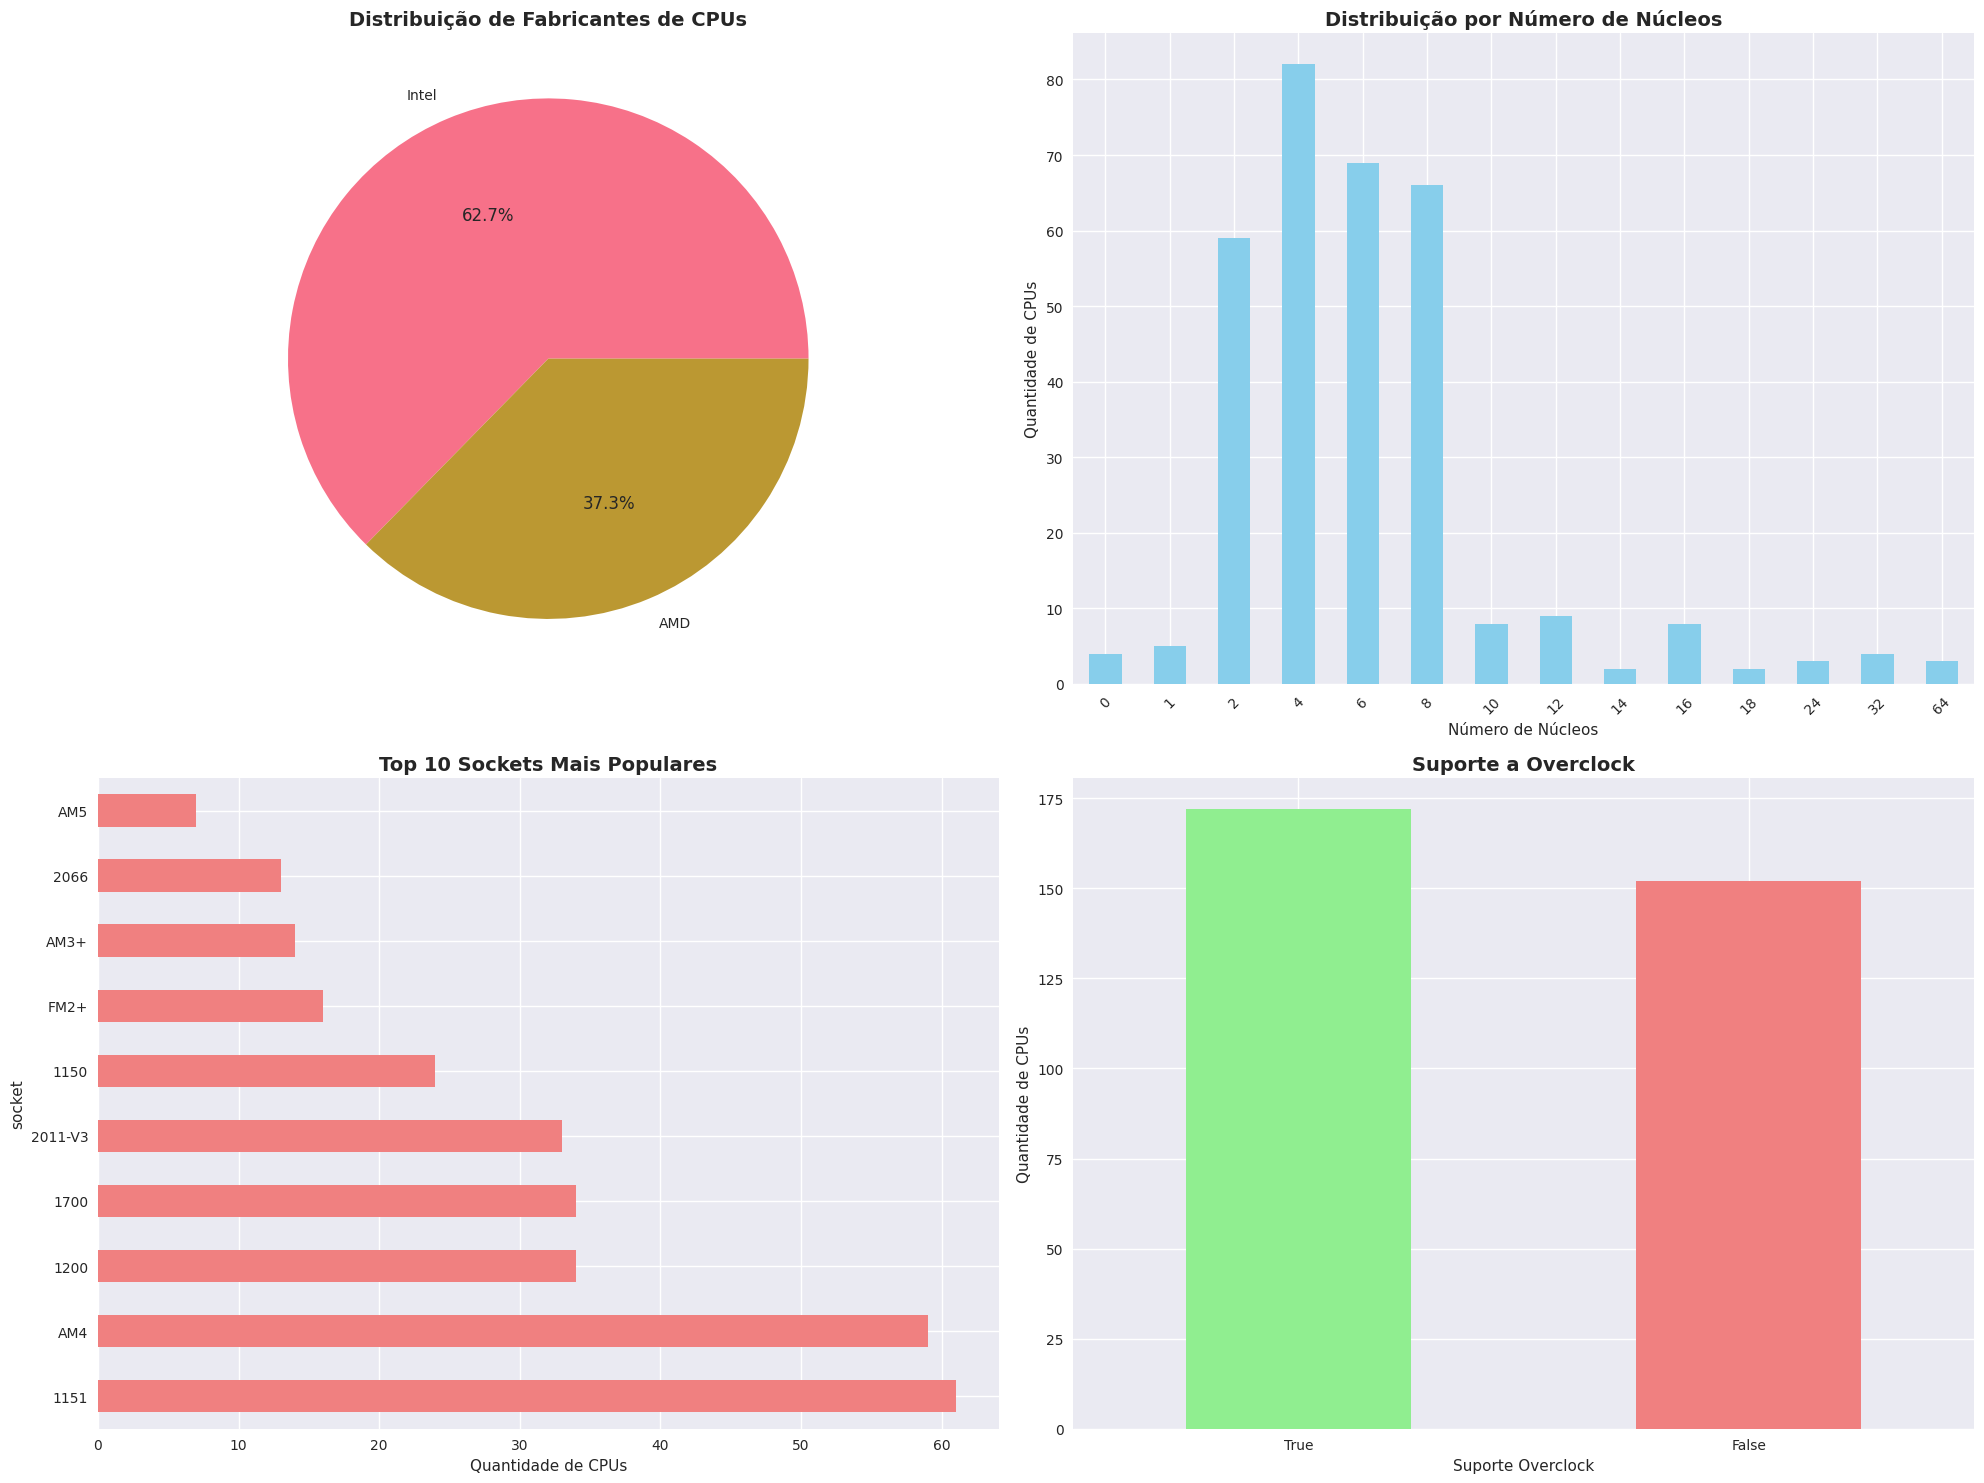


ESTATÍSTICAS DESCRITIVAS DETALHADAS - CPUs

1. NÚMERO DE NÚCLEOS:
Média: 6.68
Mediana: 6.00
Moda: 4
Desvio Padrão: 7.27
Variância: 52.91
Coeficiente de Variação: 108.86%

2. ANÁLISE POR FABRICANTE:

AMD:
  Total de modelos: 121
  Núcleos médios: 8.74
  % com Overclock: 79.3%
  Sockets principais: AM4, FM2+, AM3+

Intel:
  Total de modelos: 203
  Núcleos médios: 5.46
  % com Overclock: 37.4%
  Sockets principais: 1151, 1200, 1700


In [11]:
# Visualizações para análise de CPUs
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Distribuição de fabricantes
cpu_data['manufacturer'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Distribuição de Fabricantes de CPUs', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('')

# 2. Distribuição de núcleos
cpu_data['n_cores'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Distribuição por Número de Núcleos', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Número de Núcleos')
axes[0,1].set_ylabel('Quantidade de CPUs')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Top 10 sockets mais populares
top_sockets = cpu_data['socket'].value_counts().head(10)
top_sockets.plot(kind='barh', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Top 10 Sockets Mais Populares', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Quantidade de CPUs')

# 4. Suporte a Overclock
overclock_counts = cpu_data['overclock'].value_counts()
colors = ['lightgreen', 'lightcoral']
overclock_counts.plot(kind='bar', ax=axes[1,1], color=colors)
axes[1,1].set_title('Suporte a Overclock', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Suporte Overclock')
axes[1,1].set_ylabel('Quantidade de CPUs')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Estatísticas descritivas detalhadas
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DETALHADAS - CPUs")
print("="*60)
print("\n1. NÚMERO DE NÚCLEOS:")
print(f"Média: {cpu_data['n_cores'].mean():.2f}")
print(f"Mediana: {cpu_data['n_cores'].median():.2f}")
print(f"Moda: {cpu_data['n_cores'].mode().iloc[0]}")
print(f"Desvio Padrão: {cpu_data['n_cores'].std():.2f}")
print(f"Variância: {cpu_data['n_cores'].var():.2f}")
print(f"Coeficiente de Variação: {(cpu_data['n_cores'].std()/cpu_data['n_cores'].mean())*100:.2f}%")

# Análise por fabricante
print(f"\n2. ANÁLISE POR FABRICANTE:")
for fabricante in cpu_data['manufacturer'].unique():
    subset = cpu_data[cpu_data['manufacturer'] == fabricante]
    print(f"\n{fabricante}:")
    print(f"  Total de modelos: {len(subset)}")
    print(f"  Núcleos médios: {subset['n_cores'].mean():.2f}")
    print(f"  % com Overclock: {(subset['overclock'].sum()/len(subset))*100:.1f}%")
    sockets_principais = subset['socket'].value_counts().head(3).index.astype(str).tolist()
    print(f"  Sockets principais: {', '.join(sockets_principais)}")


=== ANÁLISE UNIVARIADA - GPUs ===
Total de GPUs: 1325

1. DISTRIBUIÇÃO POR FABRICANTE:
manufacturer
ASUS        302
Gigabyte    242
EVGA        177
MSI         172
INNO3D      109
ZOTAC        99
Sapphire     64
Palit        32
PNY          26
SAPPHIRE     23
Name: count, dtype: int64

2. DISTRIBUIÇÃO DE VRAM:
vram_numeric
0.00       2
1.00      21
2.00      89
3.00      29
4.00     148
6.00     157
8.00     491
10.00     49
11.00    110
12.00    115
16.00     65
20.00      3
24.00     45
Name: count, dtype: int64

3. ESTATÍSTICAS DE CONSUMO ENERGÉTICO:
count   1324.00
mean     201.78
std       99.84
min        0.00
25%      125.00
50%      180.00
75%      250.00
max      750.00
Name: consumption_numeric, dtype: float64


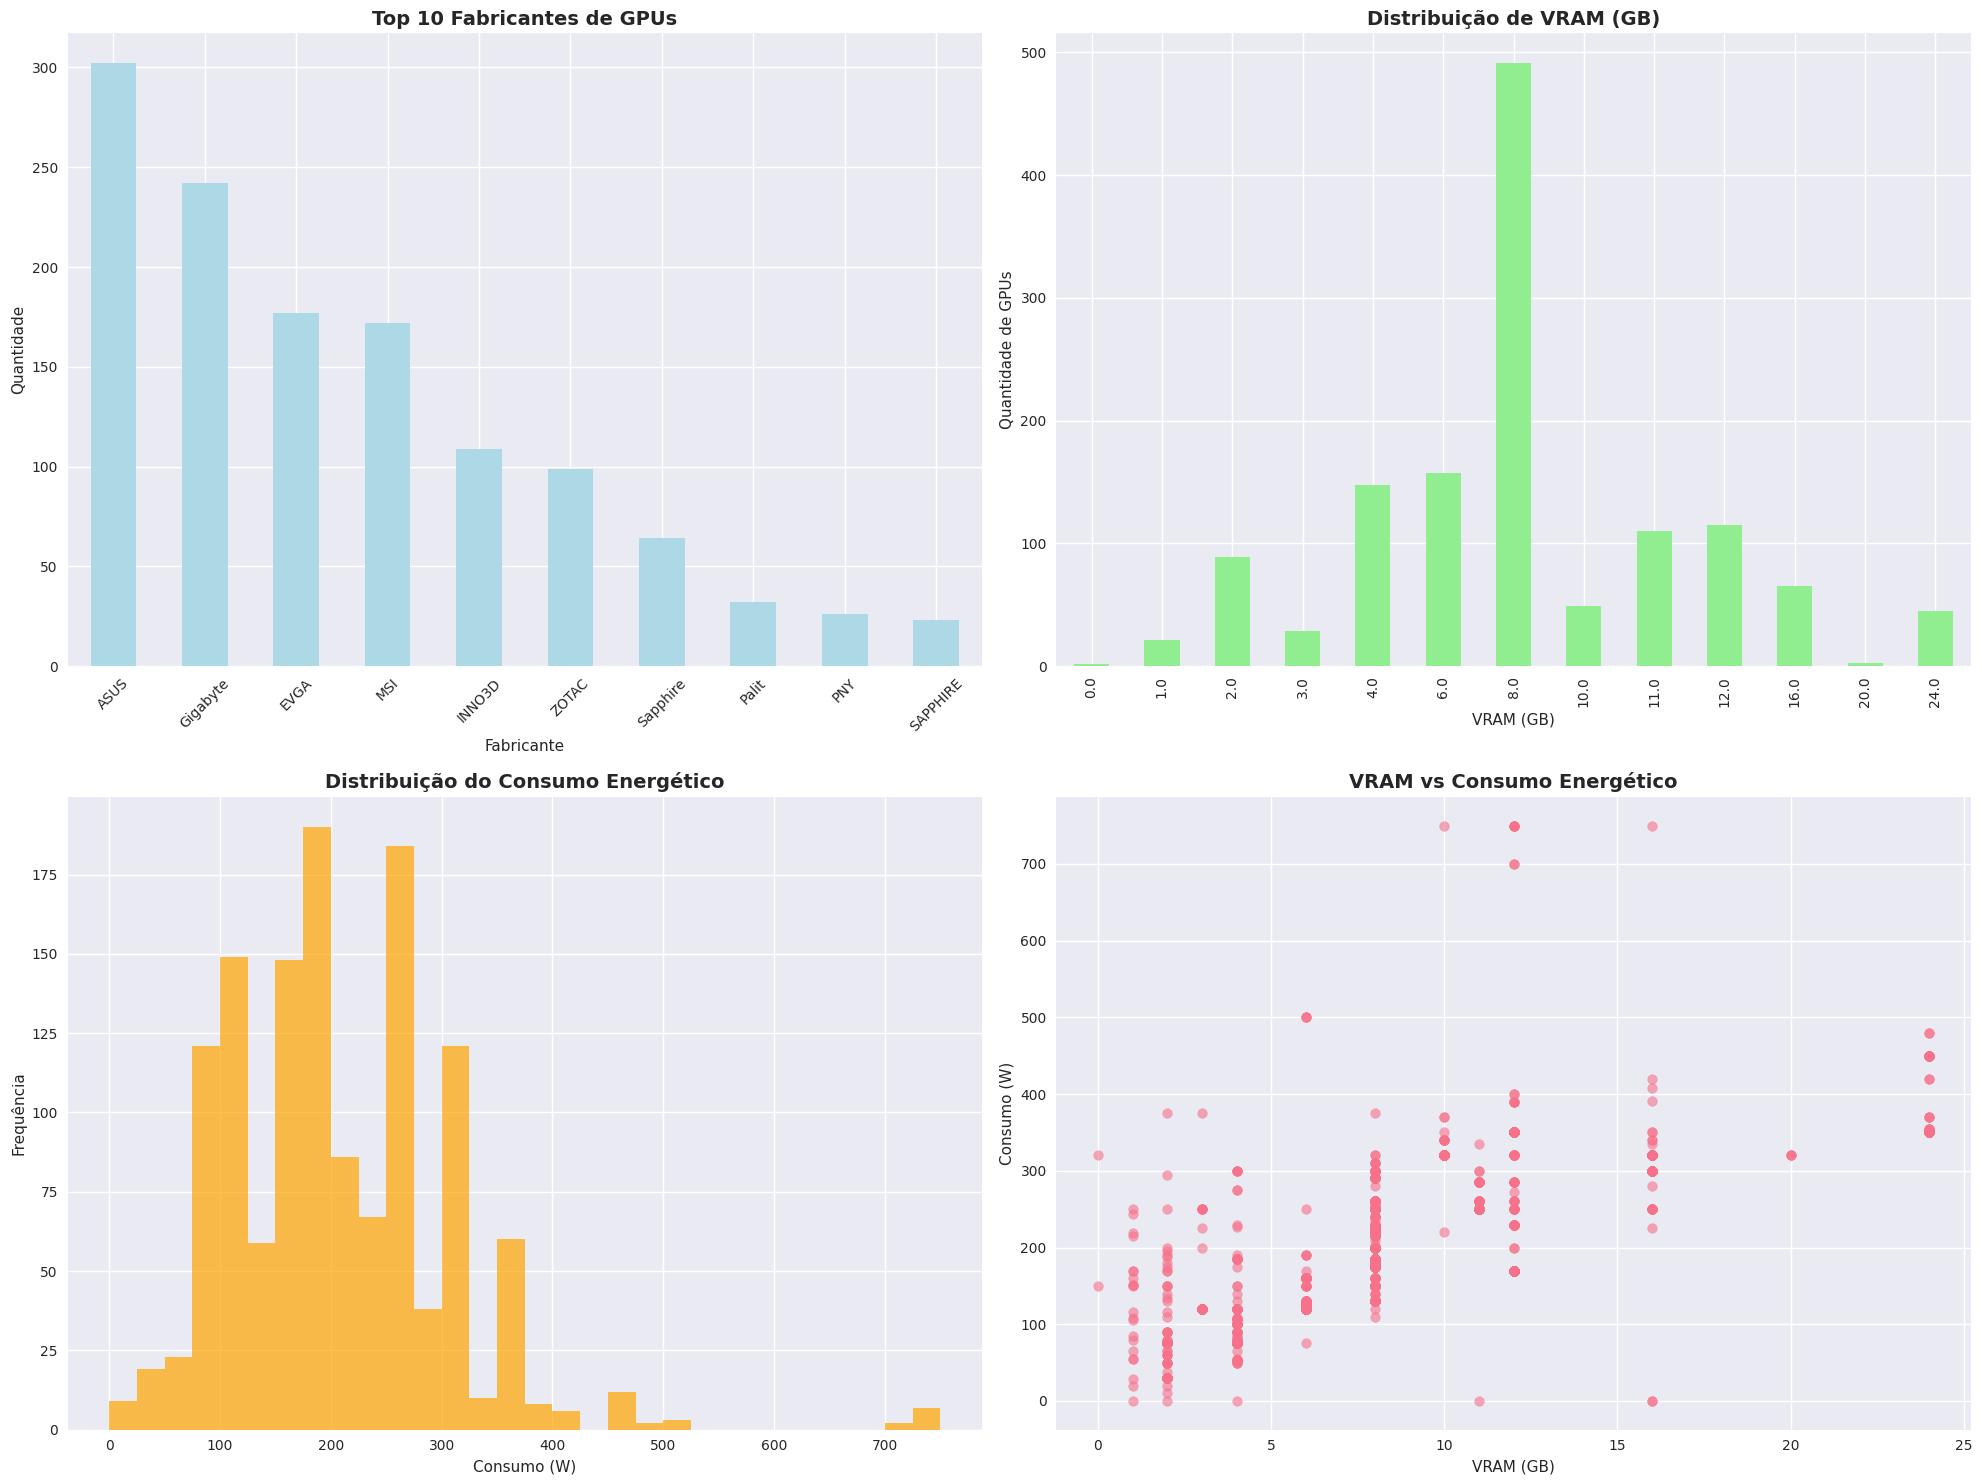


=== CORRELAÇÃO VRAM vs CONSUMO ===
Correlação de Pearson: 0.702
Correlação FORTE


In [12]:
# Análise detalhada de GPUs
def analisar_gpus():
    """Realiza análise univariada detalhada dos dados de GPUs"""
    gpu_df = datasets['GPUs'].copy()
    
    print("=== ANÁLISE UNIVARIADA - GPUs ===")
    print(f"Total de GPUs: {len(gpu_df)}")
    
    # Limpeza de dados para análise numérica
    # Extrair valores numéricos de VRAM
    gpu_df['vram_numeric'] = gpu_df['vram'].str.extract('(\d+)').astype(float)
    
    # Extrair valores numéricos de consumo
    gpu_df['consumption_numeric'] = gpu_df['consumption'].str.extract('(\d+)').astype(float)
    
    # Análise de fabricantes
    print("\n1. DISTRIBUIÇÃO POR FABRICANTE:")
    fabricantes_gpu = gpu_df['manufacturer'].value_counts().head(10)
    print(fabricantes_gpu)
    
    # Análise de VRAM
    print("\n2. DISTRIBUIÇÃO DE VRAM:")
    vram_dist = gpu_df['vram_numeric'].value_counts().sort_index()
    print(vram_dist)
    
    # Estatísticas de consumo
    print("\n3. ESTATÍSTICAS DE CONSUMO ENERGÉTICO:")
    consumption_stats = gpu_df['consumption_numeric'].describe()
    print(consumption_stats)
    
    return gpu_df

# Executar análise
gpu_data = analisar_gpus()

# Visualizações para GPUs
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Top 10 fabricantes de GPUs
top_manufacturers = gpu_data['manufacturer'].value_counts().head(10)
top_manufacturers.plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Top 10 Fabricantes de GPUs', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Fabricante')
axes[0,0].set_ylabel('Quantidade')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Distribuição de VRAM
vram_counts = gpu_data['vram_numeric'].value_counts().sort_index()
vram_counts.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Distribuição de VRAM (GB)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('VRAM (GB)')
axes[0,1].set_ylabel('Quantidade de GPUs')

# 3. Histograma de consumo energético
gpu_data['consumption_numeric'].dropna().hist(bins=30, ax=axes[1,0], color='orange', alpha=0.7)
axes[1,0].set_title('Distribuição do Consumo Energético', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Consumo (W)')
axes[1,0].set_ylabel('Frequência')

# 4. Scatter plot VRAM vs Consumo
clean_gpu_data = gpu_data.dropna(subset=['vram_numeric', 'consumption_numeric'])
if len(clean_gpu_data) > 0:
    axes[1,1].scatter(clean_gpu_data['vram_numeric'], clean_gpu_data['consumption_numeric'], alpha=0.6)
    axes[1,1].set_title('VRAM vs Consumo Energético', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('VRAM (GB)')
    axes[1,1].set_ylabel('Consumo (W)')

plt.tight_layout()
plt.show()

# Análise de correlação entre VRAM e consumo
if len(clean_gpu_data) > 1:
    correlation = clean_gpu_data[['vram_numeric', 'consumption_numeric']].corr().iloc[0,1]
    print(f"\n=== CORRELAÇÃO VRAM vs CONSUMO ===")
    print(f"Correlação de Pearson: {correlation:.3f}")
    
    if abs(correlation) > 0.7:
        print("Correlação FORTE")
    elif abs(correlation) > 0.5:
        print("Correlação MODERADA")
    elif abs(correlation) > 0.3:
        print("Correlação FRACA")
    else:
        print("Correlação MUITO FRACA ou INEXISTENTE")
else:
    print("\n=== DADOS INSUFICIENTES PARA CORRELAÇÃO ===")
